# Import Library

In [30]:
# Library Pembantu
import pandas as pd
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining

import numpy as np
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas

# Library Akses Github
import requests
import csv
from io import StringIO

# Library Pre-processing Text
import re
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.util import ngrams

# Sentiment Analyzer Bahasa Inggris Menggunakan VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Library Ekstraksi Data dan Model Machine Learning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Library Model Deep Learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Library Menyimpan Model
import joblib

In [31]:
# Mengunduh dataset nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Loading Dataset


In [32]:
# Load data ulasan
app_reviews_df = pd.read_csv('/content/ulasan_classroom.csv')

# Membuat DataFrame dari file csv
app_reviews_df = pd.DataFrame(app_reviews_df)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

print('Jumlah ulasan: ', jumlah_ulasan)
print('Jumlah kolom: ', jumlah_kolom)

Jumlah ulasan:  50000
Jumlah kolom:  11


In [33]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,db029622-105c-4579-bde3-8bf024d1cd3e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Every time I open the app on my phone, it free...",1,152,3.43.813780432,2025-10-15 23:42:36,Hi Francesca. Try restarting your phone and ma...,2025-10-16 03:28:15,3.43.813780432
1,47e0a168-9552-4e19-b9cf-3e8764c978c0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Using the app on my phone is terrible. I const...,2,170,3.39.790965871,2025-08-20 21:37:54,"Hi, Alyssa. Try restarting your phone and make...",2025-08-20 22:10:37,3.39.790965871
2,18304d3c-6e09-494e-9829-d5a3775df806,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"After the latest update, the app won't launch,...",2,107,3.33.759298299,2025-06-14 14:42:05,"Hi, Jonathan. Thank you for taking the time to...",2025-06-14 15:44:47,3.33.759298299
3,6a52fefb-622e-4d39-a702-7d22022c9515,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Needs to show when there is a comment made not...,1,309,7.1.061.05.35,2021-04-02 13:52:17,NaN,NaN,7.1.061.05.35
4,8cfdaf8e-128d-463e-a290-72c62131af4a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"When the app actually works, it's a great app....",1,2405,6.11.461.03.45,2020-12-01 14:48:17,NaN,NaN,6.11.461.03.45


In [34]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   userName              50000 non-null  object
 2   userImage             50000 non-null  object
 3   content               50000 non-null  object
 4   score                 50000 non-null  int64 
 5   thumbsUpCount         50000 non-null  int64 
 6   reviewCreatedVersion  38098 non-null  object
 7   at                    50000 non-null  object
 8   replyContent          10625 non-null  object
 9   repliedAt             10625 non-null  object
 10  appVersion            38098 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.2+ MB


# Text Preprocessing

In [35]:
# Membuat DataFrame baru (clean_df) dengan menghilangkan 'replyContent' dan 'repliedAt' karena kebanyakan NaN
clean_df = app_reviews_df.drop(['replyContent', 'repliedAt'], axis=1)

# Menghapus baris yang memiliki nilai yang hilang (NaN)
clean_df = clean_df.dropna()

In [36]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [37]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,db029622-105c-4579-bde3-8bf024d1cd3e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Every time I open the app on my phone, it free...",1,152,3.43.813780432,2025-10-15 23:42:36,3.43.813780432
1,47e0a168-9552-4e19-b9cf-3e8764c978c0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Using the app on my phone is terrible. I const...,2,170,3.39.790965871,2025-08-20 21:37:54,3.39.790965871
2,18304d3c-6e09-494e-9829-d5a3775df806,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"After the latest update, the app won't launch,...",2,107,3.33.759298299,2025-06-14 14:42:05,3.33.759298299
3,6a52fefb-622e-4d39-a702-7d22022c9515,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Needs to show when there is a comment made not...,1,309,7.1.061.05.35,2021-04-02 13:52:17,7.1.061.05.35
4,8cfdaf8e-128d-463e-a290-72c62131af4a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"When the app actually works, it's a great app....",1,2405,6.11.461.03.45,2020-12-01 14:48:17,6.11.461.03.45


In [38]:
# Fungsi Cleaning Text
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip() # menghapus karakter spasi dari kiri dan kanan teks
    return text

# Fungsi CaseFolding Text
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

# Fungsi Slangwords
slangwords = dict()
slangwords_url = 'https://raw.githubusercontent.com/bodhwani/NLP-VIT-BOT/master/slangs.csv'

response = requests.get(slangwords_url)

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    # Skip kolom header
    next(reader)

    for row in reader:
        # Slang kolom 2
        slang = row[1].strip().lower()

        # Meaning kolom 3
        meaning = row[2].strip()

        slangwords[slang] = meaning

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

# Fungsi Tokenizing Text
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

# Fungsi Stopwords
listStopwords = set(stopwords.words('english'))

def filteringText(text): # Menghapus stopwords dalam teks
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

# Fungsi Lematizer Text
lemmatizer = WordNetLemmatizer()

def lemmatizingText(text):
    lemmatized = []
    for word in text:
        lemma_word = lemmatizer.lemmatize(word.lower(), pos=wordnet.VERB)  # Mengonversi ke huruf kecil untuk memastikan pemrosesan yang konsisten
        lemmatized.append(lemma_word)
    text = lemmatized
    return text

# Fungsi Join Text
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [39]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata dan menyimmpannya di 'text_stemmingText'
clean_df['text_lemmatizingText'] = clean_df['text_stopword'].apply(lemmatizingText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_lemmatizingText'].apply(toSentence)

In [40]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatizingText,text_akhir
0,db029622-105c-4579-bde3-8bf024d1cd3e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Every time I open the app on my phone, it free...",1,152,3.43.813780432,2025-10-15 23:42:36,3.43.813780432,Every time I open the app on my phone it freez...,every time i open the app on my phone it freez...,every time i open the Application on my phone ...,"[every, time, i, open, the, Application, on, m...","[every, time, open, Application, phone, freeze...","[every, time, open, application, phone, freeze...",every time open application phone freeze i com...
1,47e0a168-9552-4e19-b9cf-3e8764c978c0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Using the app on my phone is terrible. I const...,2,170,3.39.790965871,2025-08-20 21:37:54,3.39.790965871,Using the app on my phone is terrible I consta...,using the app on my phone is terrible i consta...,using the Application on my phone is terrible ...,"[using, the, Application, on, my, phone, is, t...","[using, Application, phone, terrible, constant...","[use, application, phone, terrible, constantly...",use application phone terrible constantly chec...
2,18304d3c-6e09-494e-9829-d5a3775df806,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"After the latest update, the app won't launch,...",2,107,3.33.759298299,2025-06-14 14:42:05,3.33.759298299,After the latest update the app wont launch ev...,after the latest update the app wont launch ev...,after the latest update the Application wont l...,"[after, the, latest, update, the, Application,...","[latest, update, Application, wont, launch, ev...","[latest, update, application, wont, launch, ev...",latest update application wont launch even rei...
3,6a52fefb-622e-4d39-a702-7d22022c9515,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Needs to show when there is a comment made not...,1,309,7.1.061.05.35,2021-04-02 13:52:17,7.1.061.05.35,Needs to show when there is a comment made not...,needs to show when there is a comment made not...,needs to show when there is a comment made not...,"[needs, to, show, when, there, is, a, comment,...","[needs, show, comment, made, notification, bar...","[need, show, comment, make, notification, bar,...",need show comment make notification bar across...
4,8cfdaf8e-128d-463e-a290-72c62131af4a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"When the app actually works, it's a great app....",1,2405,6.11.461.03.45,2020-12-01 14:48:17,6.11.461.03.45,When the app actually works its a great app He...,when the app actually works its a great app he...,when the Application actually works its a grea...,"[when, the, Application, actually, works, its,...","[Application, actually, works, great, Applicat...","[application, actually, work, great, applicati...",application actually work great application he...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,7617aa2b-b5f7-44ef-867d-286ef9dfbbae,Arturo Gonzalez,https://play-lh.googleusercontent.com/a-/ALV-U...,Makes you have explosive dihhera,1,0,6.9.381.06.33,2021-03-21 22:08:37,6.9.381.06.33,Makes you have explosive dihhera,makes you have explosive dihhera,makes you have explosive dihhera,"[makes, you, have, explosive, dihhera]","[makes, explosive, dihhera]","[make, explosive, dihhera]",make explosive dihhera
49992,7ae490bf-246b-4f00-b142-1652e4aced0a,ngwira whitney,https://play-lh.googleusercontent.com/a/ACg8oc...,It teaches us more things 🥰😍🥰😍,5,1,7.6.261.21.33.03,2021-08-17 07:41:25,7.6.261.21.33.03,It teaches us more things,it teaches us more things,it teaches United States more things,"[it, teaches, United, States, more, things]","[teaches, United, States, things]","[teach, unite, state, things]",teach unite state things
49993,e3ec6557-1095-479d-9dec-b029c9916a2f,Siddhant Dix

# Sentiment Analysis


In [41]:
# Inisialisasi analyzer VADER
analyzer = SentimentIntensityAnalyzer()

def sentiment_analysis_lexicon_english(text):
    # Method analisa dari VADER
    score = analyzer.polarity_scores(text)
    totalScore = score['compound']

    # Membagi ke 3 kelas: positive, negative, dan neutral
    if totalScore > 0.05:
        polarity = 'positive'
    elif totalScore < -0.05:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [42]:
results = clean_df['text_akhir'].apply(sentiment_analysis_lexicon_english)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    21964
negative    10460
neutral      5674
Name: count, dtype: int64


Visualisasi Menggunakan Pie Chart

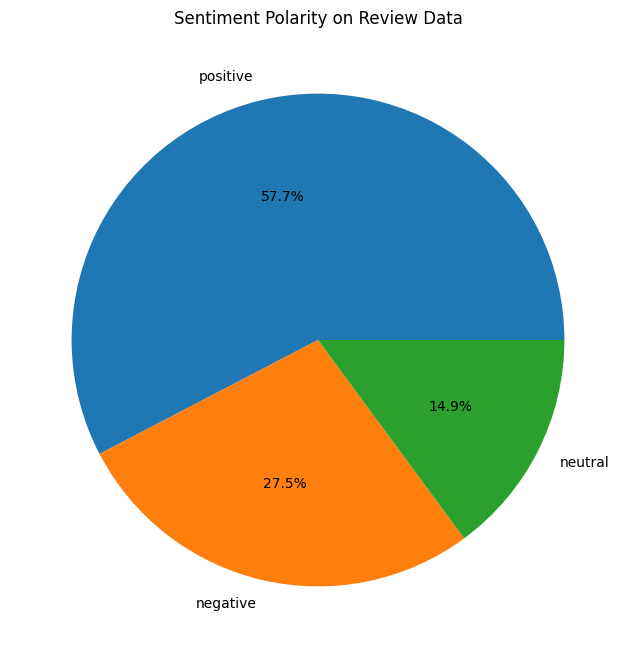

In [43]:
polarity_counts = clean_df['polarity'].value_counts()
labels = polarity_counts.index
values = polarity_counts.values

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Polarity on Review Data')
plt.show()

Visualisasi Menggunakan WordCloud

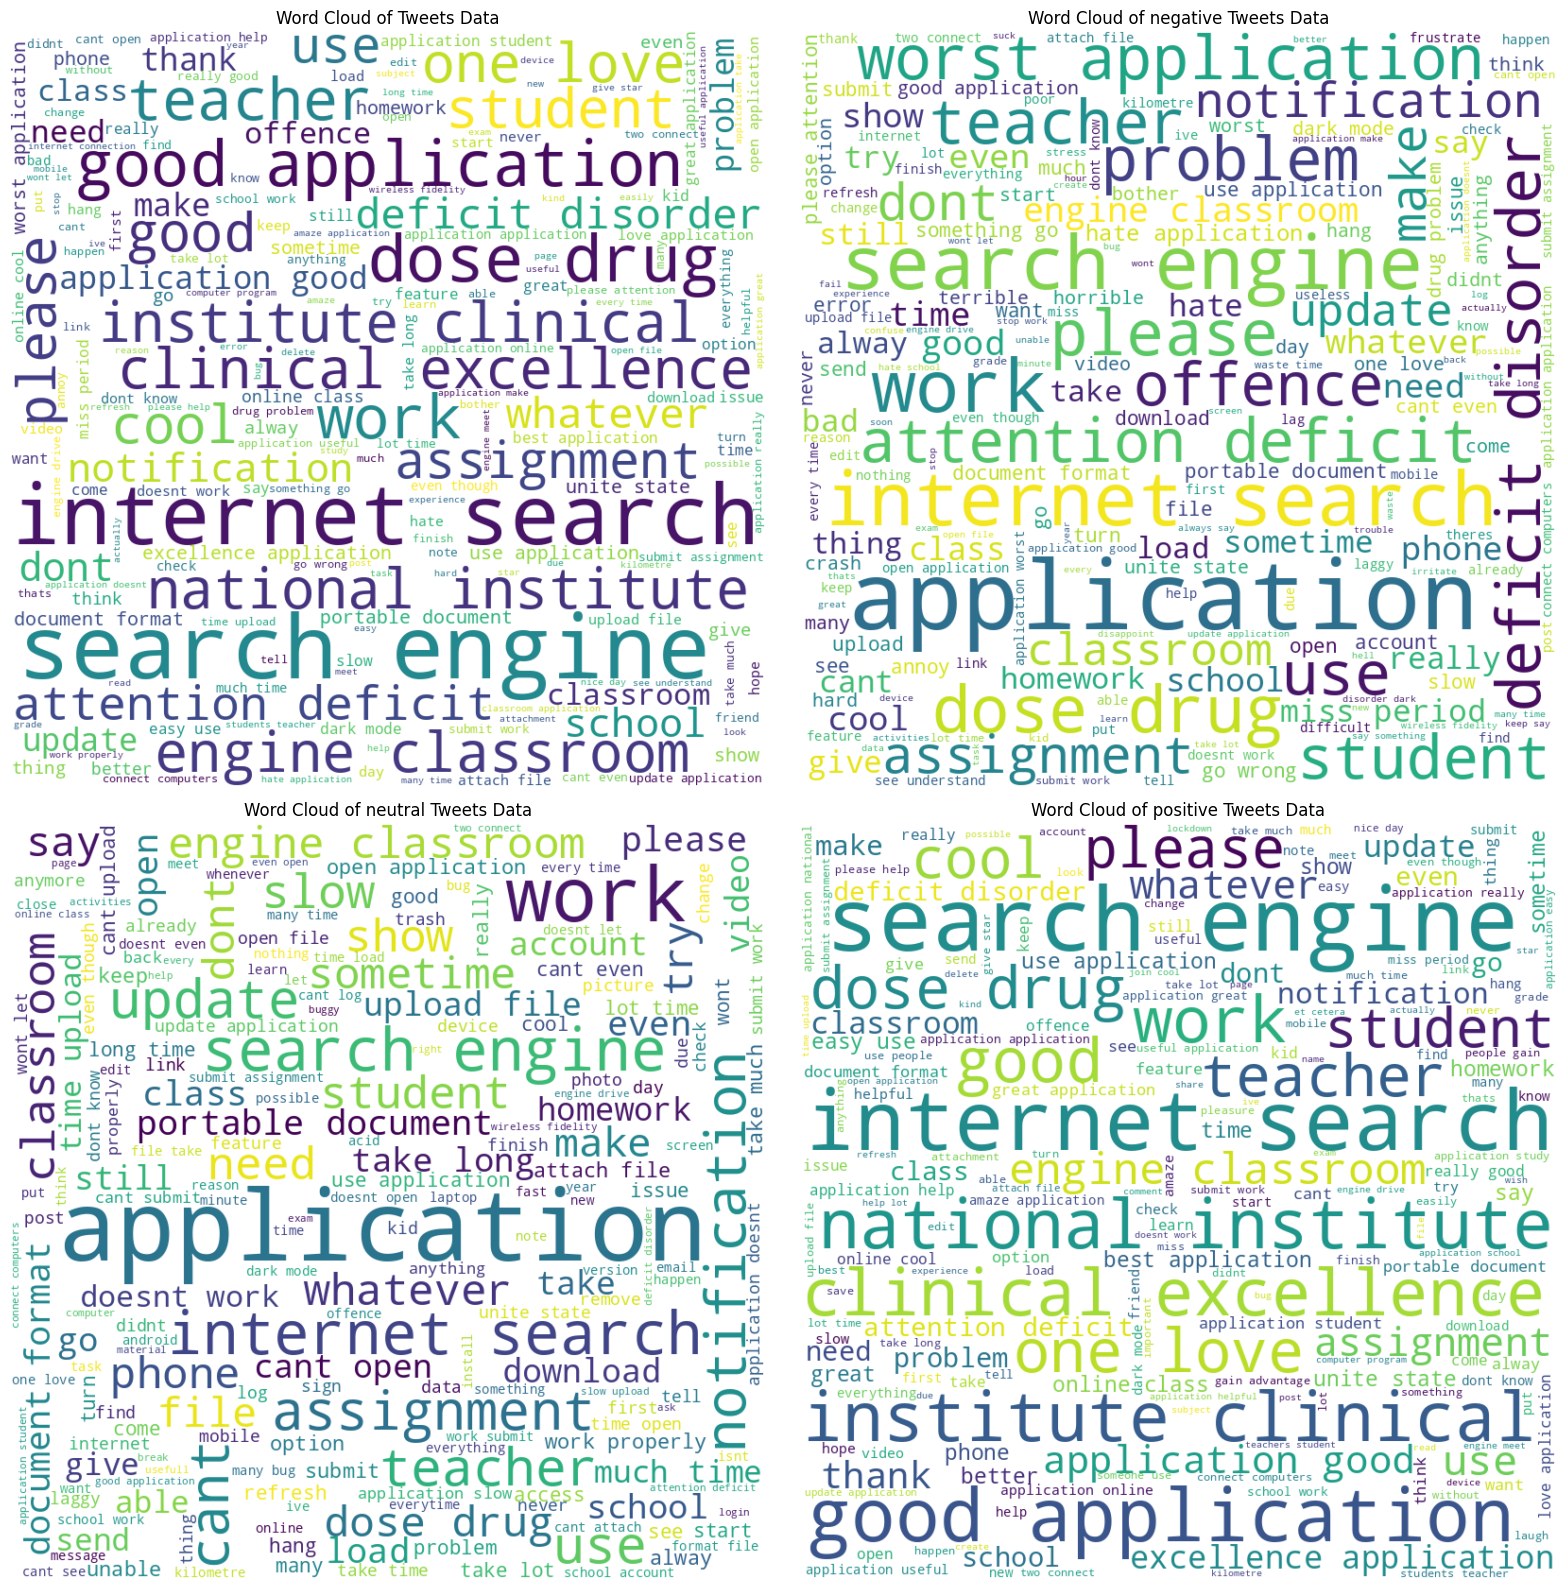

In [44]:
# Membuat string kosong 'list_words' untuk mengumpulkan semua kata dari teks yang sudah dibersihkan
list_text = ' '.join(clean_df['text_akhir'])

# Membuat wordcloud
wc_general = WordCloud(width=800, height=800, background_color='white').generate(list_text)

# Menampilkan WordCloud
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

axes[0].imshow(wc_general, interpolation='bilinear')
axes[0].set_title(f'Word Cloud of Tweets Data')
axes[0].axis('off')

sentiment = ['negative', 'neutral', 'positive']

for i, polarity in enumerate(sentiment):
    polarityClass = clean_df[clean_df['polarity'] == polarity]
    text = ' '.join(polarityClass['text_akhir'])
    wc_polarity = WordCloud(width=800, height=800, background_color='white').generate(text)

    axes[i+1].imshow(wc_polarity, interpolation='bilinear')
    axes[i+1].set_title(f'Word Cloud of {polarity} Tweets Data')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

# Source: Ini adalah modifikasi kode dari forum diskusi Belajar Fundamental Deep Learning dan kombinasi dengan modul Belajar Machine Learning untuk Pemula

# Ekstraksi Data


In [45]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=1000, min_df=17, max_df=0.8, ngram_range=(1, 2)) # Maksimal fitur 1000, 1-2 gram
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
display(features_df)

,able,absolutely,access,account,acid,activities,activity,actually,add,administrator,...,yeah,year,years,yes,yet,you,your,youre,zero,zoom
0,0.000000,0.0,0.112197,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.122606,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.122917,0.0,0.000000,0.0,0.0,0.0,0.0,0.1563,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38093,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38094,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38095,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38096,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menyimpan Model TF-IDF

In [46]:
joblib.dump(tfidf, "TFIDF_model_sentiment.pkl")

['TFIDF_model_sentiment.pkl']

# Data Splitting dan Ekstraksi Fitur dengan TF-IDF (N-gram), Modeling dengan Logistic Regression, dan Pembagian Data: 70/30




In [47]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.896655167241638
Logistic Regression - accuracy_test: 0.8874890638670166


Menyimpan Model Logistic Regression

In [48]:
joblib.dump(logistic_regression, "LR_model_sentiment.h5")

['LR_model_sentiment.h5']

# Data Splitting dan Ekstraksi Fitur dengan TF-IDF (N-gram), Modeling dengan Random Forest, dan Pembagian Data: 80/20

In [49]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Membuat objek model Random Forest
random_forest = RandomForestClassifier(max_depth=70) # max_depth=70 agar tidak overfit

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9685674913052037
Random Forest - accuracy_test: 0.8509186351706036


Model Random Forest tidak disimpan karena terlalu besar dan overfit

# Data Splitting dan Ekstraksi Fitur dengan TF-IDF (N-gram), Modeling dengan Dense Neural Network (DNN), dan Pembagian Data: 80/20

In [50]:
# Ubah tipe data y menjadi integer menggunakan LabelEncoder
y = LabelEncoder().fit_transform(clean_df['polarity'])

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Membuat model DNN
model = Sequential([Dense(64, activation="relu", input_shape=(X_tfidf.shape[1],)),
                    BatchNormalization(momentum=0.99),
                    Dropout(0.5),
                    Dense(32, activation="relu"),
                    BatchNormalization(momentum=0.99),
                    Dropout(0.3),
                    Dense(3, activation="softmax")])
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics=['accuracy'])

# Fungsi callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

# Melatih model DNN
hist = model.fit(X_train.toarray(), y_train, batch_size=128, epochs=20, callbacks = [callbacks])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5061 - loss: 1.1709
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7705 - loss: 0.5751
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8274 - loss: 0.4670
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8519 - loss: 0.4168
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8707 - loss: 0.3766
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8730 - loss: 0.3652
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8830 - loss: 0.3396
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8882 - loss: 0.3239
Epoch 9/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8921 - loss: 0.3100
Epoch 10/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8972 - loss: 0.2982
Epoch 11/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8978 - loss: 0.2965
Epoch 12/20
233/239 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

In [51]:
# Evaluasi model DNN
model.evaluate(X_test.toarray(), y_test, batch_size=1)

7620/7620 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.8967 - loss: 0.3176


[0.3214567303657532, 0.8958005309104919]

Menyimpan Model DNN

In [52]:
model.save("DNN_model_sentiment.h5")

Visualisasi Loss dan Akurasi

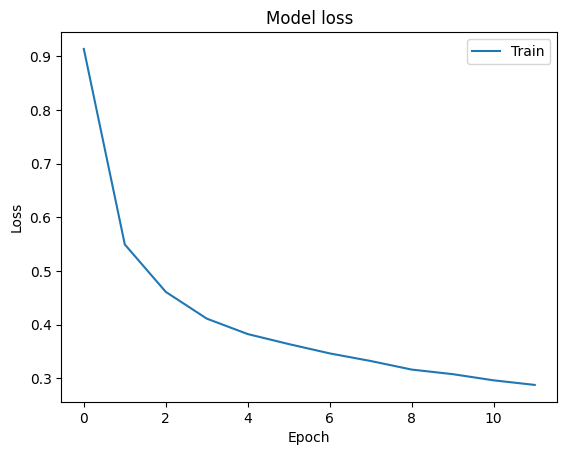

In [53]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

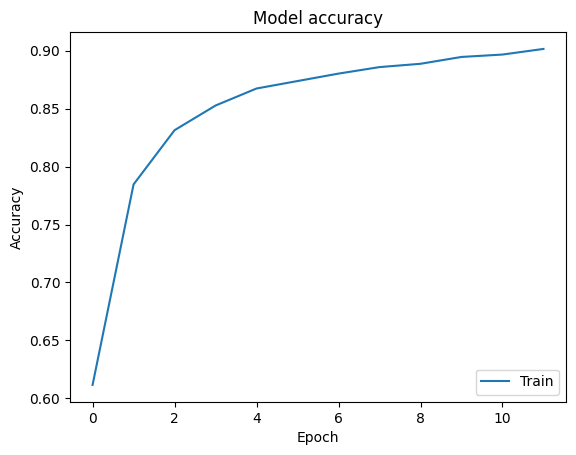

In [54]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

# Inference


In [55]:
# Label tiap sentiment
sentiment = ['negative', 'neutral', 'positive']
le_sentiment = LabelEncoder()
le_sentiment.fit(sentiment)

LabelEncoder()

In [56]:
# Fungsi semua preprocessing
def preprocessing(text):
    text = cleaningText(text)
    text = casefoldingText(text)
    text = fix_slangwords(text)
    text = tokenizingText(text)
    text = filteringText(text)
    text = lemmatizingText(text)
    text = toSentence(text)
    return text

# Fungsi inference input user
def inference(text):
    input_preprocessing = preprocessing(text)
    input_tfidf = tfidf.transform([input_preprocessing])

    # Prediksi tiap model
    prediksi_LR = logistic_regression.predict(input_tfidf)
    prediksi_RF = random_forest.predict(input_tfidf)
    prediksi_DNN = model.predict(input_tfidf.toarray())

    # Hasil prediksi
    hasil_prediksi_LR = sentiment[le_sentiment.transform(prediksi_LR)[0]]
    hasil_prediksi_RF = sentiment[le_sentiment.transform(prediksi_RF)[0]]
    hasil_prediksi_DNN = sentiment[np.argmax(prediksi_DNN)]

    # Output
    print("Hasil prediksi sentiment menggunakan model Logistic Regression:", hasil_prediksi_LR)
    print("Hasil prediksi sentiment menggunakan model Random Forest:", hasil_prediksi_RF)
    print("Hasil prediksi sentiment menggunakan model Dense Neural Network:", hasil_prediksi_DNN)

Input User

In [57]:
input_user = input("Masukkan review: ")
inference(input_user)

Masukkan review: this app sucks ngl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
Hasil prediksi sentiment menggunakan model Logistic Regression: negative
Hasil prediksi sentiment menggunakan model Random Forest: negative
Hasil prediksi sentiment menggunakan model Dense Neural Network: negative


In [58]:
input_user = input("Masukkan review: ")
inference(input_user)

Masukkan review: hello my name is nelson
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Hasil prediksi sentiment menggunakan model Logistic Regression: neutral
Hasil prediksi sentiment menggunakan model Random Forest: neutral
Hasil prediksi sentiment menggunakan model Dense Neural Network: neutral


In [59]:
input_user = input("Masukkan review: ")
inference(input_user)

Masukkan review: i love studying
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Hasil prediksi sentiment menggunakan model Logistic Regression: positive
Hasil prediksi sentiment menggunakan model Random Forest: positive
Hasil prediksi sentiment menggunakan model Dense Neural Network: positive
